In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('F:/data_science/flights.csv')
data

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T14:00:00Z
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30T22:00:00Z
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T12:00:00Z
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T11:00:00Z


In [4]:
data.shape

(336776, 19)

In [5]:
data.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [6]:
data['dep_time'].fillna(value=data['dep_time'].mean(), inplace=True)
data['dep_delay'].fillna(value=data['dep_delay'].mean(), inplace=True)
data['arr_time'].fillna(value=data['dep_time'].mean(), inplace=True)
data['arr_delay'].fillna(value=data['arr_delay'].mean(), inplace=True)
#data['tailnum'].ffillna(value=data['tailnum'], inplace=True)
data['air_time'].fillna(value=data['air_time'].mean(), inplace=True)

#df[['S2','S3']] = df[['S2','S3']].fillna(value=df[['S2','S3']].mean()) multiple columns

data
#df.fillna(method='ffill', inplace=True)


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.000000,515,2.00000,830.000000,819,11.000000,UA,1545,N14228,EWR,IAH,227.00000,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.000000,529,4.00000,850.000000,830,20.000000,UA,1714,N24211,LGA,IAH,227.00000,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.000000,540,2.00000,923.000000,850,33.000000,AA,1141,N619AA,JFK,MIA,160.00000,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.000000,545,-1.00000,1004.000000,1022,-18.000000,B6,725,N804JB,JFK,BQN,183.00000,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.000000,600,-6.00000,812.000000,837,-25.000000,DL,461,N668DN,LGA,ATL,116.00000,762,6,0,2013-01-01T06:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,1349.109947,1455,12.63907,1349.109947,1634,6.895377,9E,3393,NaN,JFK,DCA,150.68646,213,14,55,2013-09-30T14:00:00Z
336772,2013,9,30,1349.109947,2200,12.63907,1349.109947,2312,6.895377,9E,3525,NaN,LGA,SYR,150.68646,198,22,0,2013-09-30T22:00:00Z
336773,2013,9,30,1349.109947,1210,12.63907,1349.109947,1330,6.895377,MQ,3461,N535MQ,LGA,BNA,150.68646,764,12,10,2013-09-30T12:00:00Z
336774,2013,9,30,1349.109947,1159,12.63907,1349.109947,1344,6.895377,MQ,3572,N511MQ,LGA,CLE,150.68646,419,11,59,2013-09-30T11:00:00Z


In [7]:
data.isnull().sum()

year                 0
month                0
day                  0
dep_time             0
sched_dep_time       0
dep_delay            0
arr_time             0
sched_arr_time       0
arr_delay            0
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time             0
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [8]:
data.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1498.098035,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,482.260302,467.335756,39.714191,526.880419,497.457142,44.003969,1632.471938,92.367314,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,915.000000,906.000000,-5.000000,1110.000000,1124.000000,-16.000000,553.000000,84.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1349.109947,1359.000000,-1.000000,1518.000000,1556.000000,-4.000000,1496.000000,132.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1737.000000,1729.000000,12.639070,1934.000000,1945.000000,13.000000,3465.000000,188.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [9]:
datacorr = data.corr()
datacorr

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,0.002942,-0.003882,-0.004573,-0.019798,-0.001185,-0.004173,-0.017132,-0.000834,0.010767,0.021636,-0.005227,0.015528
day,NaN,0.002942,1.000000,-0.000462,-0.000014,0.000415,-0.004532,-0.002403,-0.000315,-0.001791,0.002207,0.003041,-0.000055,0.000987
dep_time,NaN,-0.003882,-0.000462,1.000000,0.942741,0.260231,0.659447,0.775640,0.231908,0.041172,-0.014594,-0.013876,0.941432,0.090433
sched_dep_time,NaN,-0.004573,-0.000014,0.942741,1.000000,0.196412,0.631299,0.783342,0.171473,0.036495,-0.015316,-0.017995,0.999148,0.082960
dep_delay,NaN,-0.019798,0.000415,0.260231,0.196412,1.000000,0.028141,0.158639,0.909887,0.053709,-0.022285,-0.021482,0.195757,0.028086
arr_time,NaN,-0.001185,-0.004532,0.659447,0.631299,0.028141,1.000000,0.776635,0.024412,0.019565,0.054141,0.049940,0.631250,0.040580
sched_arr_time,NaN,-0.004173,-0.002403,0.775640,0.783342,0.158639,0.776635,1.000000,0.131520,0.021594,0.077887,0.068726,0.783283,0.050321
arr_delay,NaN,-0.017132,-0.000315,0.231908,0.171473,0.909887,0.024412,0.131520,1.000000,0.071353,-0.035297,-0.061218,0.171037,0.021213
flight,NaN,-0.000834,-0.001791,0.041172,0.036495,0.053709,0.019565,0.021594,0.071353,1.000000,-0.463045,-0.484165,0.035838,0.018137


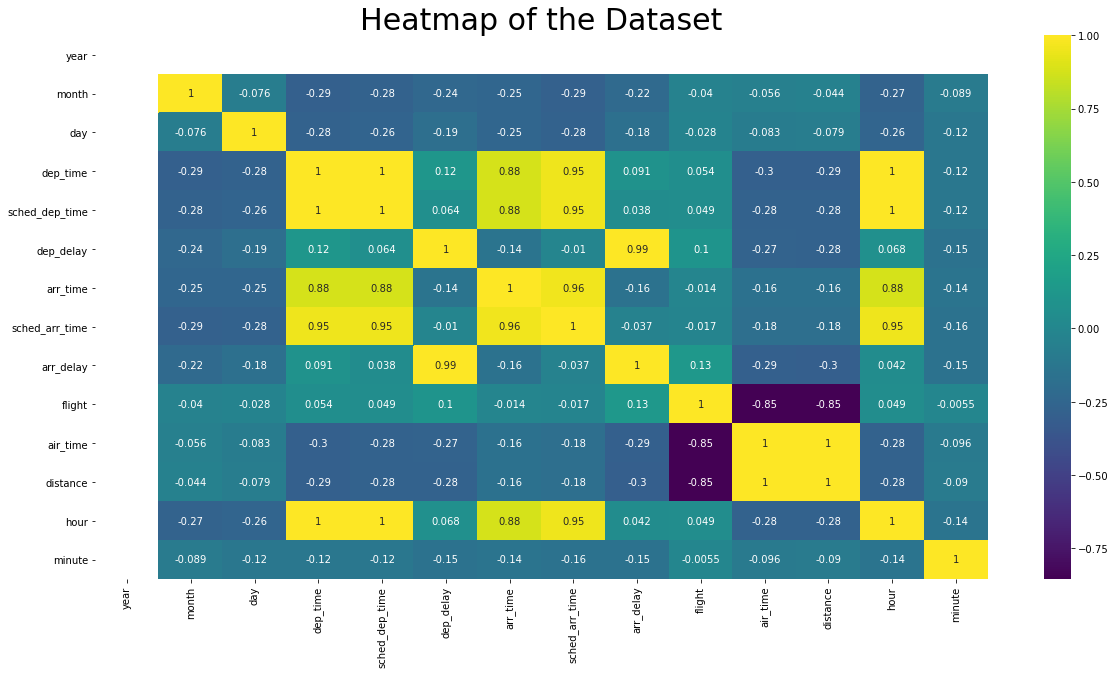

In [10]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(datacorr.corr(), annot = True, cmap = 'viridis')
plt.title('Heatmap of the Dataset', fontsize = 30)
plt.show()

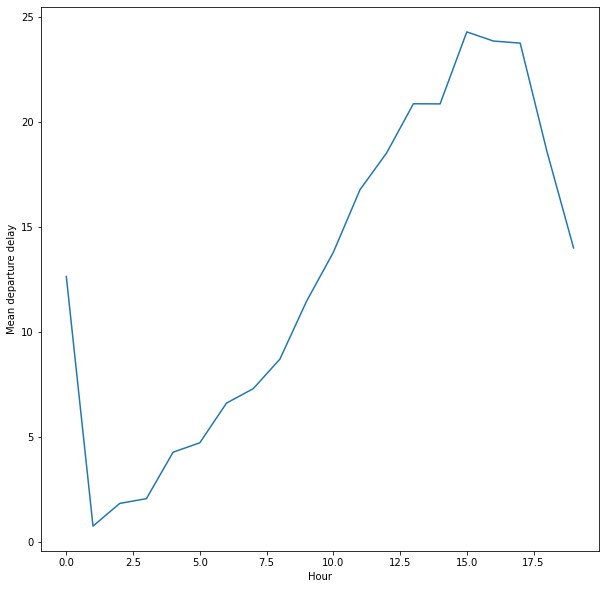

In [11]:
plt.figure(figsize=(10,10))
data.loc[data.hour == 24 ,'hour'] = 0
delay_grp = data.groupby(['hour'],as_index = False).agg({'dep_delay':'mean'})
delay_grp['dep_delay'].plot()
plt.xlabel('Hour')
plt.ylabel('Mean departure delay')
plt.show()

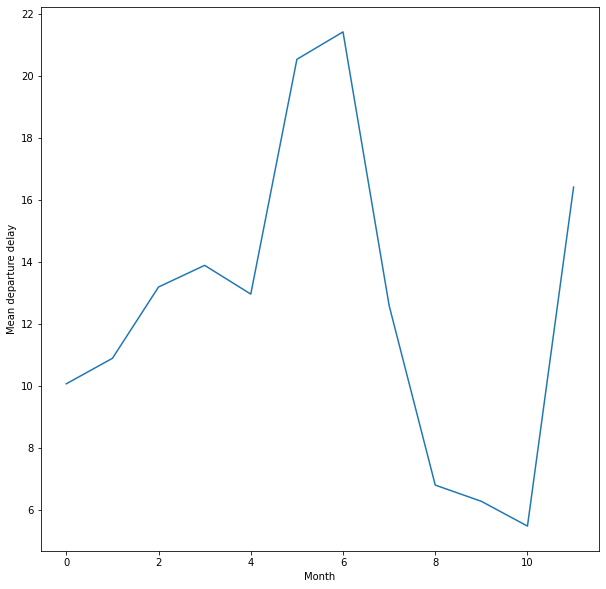

In [12]:
plt.figure(figsize=(10,10))

delay_mon_grp = data.groupby(['month'],as_index = False).agg({'dep_delay':'mean'})
delay_mon_grp['dep_delay'].plot()
plt.xlabel('Month')
plt.ylabel('Mean departure delay')
plt.show()

In [13]:
#Airport & Airline flight Information
carrier_count = data['carrier'].value_counts()
carrier_count

UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64

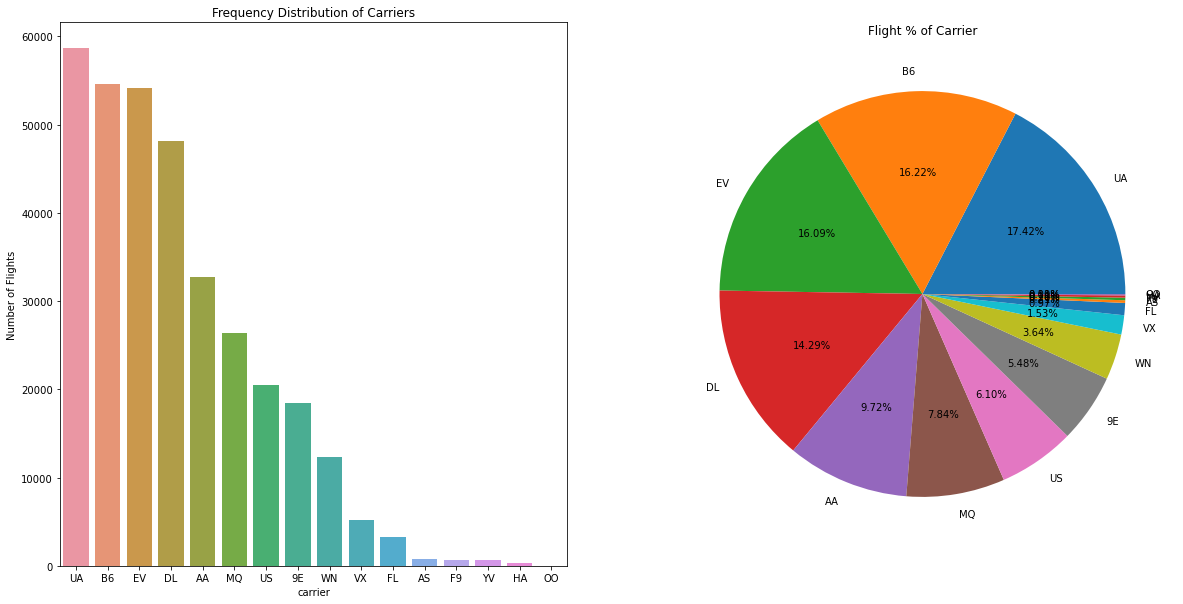

In [14]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data['carrier'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)                                                  
ax[1].set_title('Flight % of Carrier')
ax[1].set_ylabel('')
sns.countplot('carrier',order = data['carrier'].value_counts().index, data=data,ax=ax[0])
ax[0].set_title('Frequency Distribution of Carriers')
ax[0].set_ylabel('Number of Flights')
plt.show()


The top_10 destination flight from NYC are


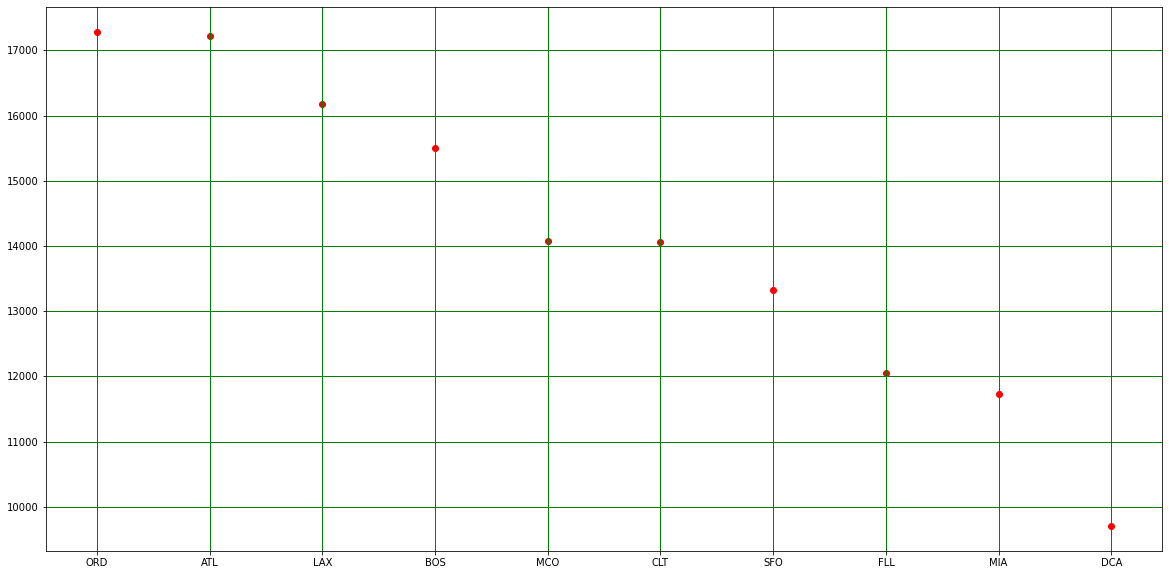

,dest,month
69,ORD,17283
4,ATL,17215
49,LAX,16174
11,BOS,15508
54,MCO,14082
23,CLT,14064
90,SFO,13331
35,FLL,12055
58,MIA,11728
28,DCA,9705


In [15]:
#Top10 destination flight from NYC 

dest_count=data.groupby(['dest'],as_index=False).agg({'month':'count'})
max_dest_count=dest_count.sort_values(['month'], ascending=False)
print("The top_10 destination flight from NYC are")
top_dest_flight = max_dest_count.head(10)
plt.scatter(top_dest_flight.dest,top_dest_flight.month, color='red')
plt.legend
plt.grid(True, color='g', linewidth=1)
plt.show()
top_dest_flight

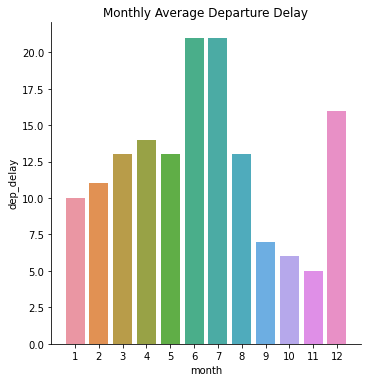

In [16]:
# Monthly Average Departure Departure Delay

monthly_delay = data.groupby(['month'], as_index=False).agg({'dep_delay': 'mean'})
monthly_delay['dep_delay']=np.round(monthly_delay['dep_delay'],0)
sns.catplot(x='month', y='dep_delay',data=monthly_delay, kind='bar')
plt.title("Monthly Average Departure Delay") 
plt.plot()
plt.show()

In [17]:
data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


In [18]:
data1 = data.loc[(data.carrier=='UA')]
data2 = data.loc[(data.carrier=='DL')]
data3 = pd.concat([data1,data2])
data3
##ufo.loc[ufo.City=='Oakland', 'State']


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01T05:00:00Z
12,2013,1,1,558.0,600,-2.0,924.0,917,7.0,UA,194,N29129,JFK,LAX,345.0,2475,6,0,2013-01-01T06:00:00Z
13,2013,1,1,558.0,600,-2.0,923.0,937,-14.0,UA,1124,N53441,EWR,SFO,361.0,2565,6,0,2013-01-01T06:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336670,2013,9,30,1955.0,2000,-5.0,2219.0,2230,-11.0,DL,1147,N992DL,LGA,ATL,99.0,762,20,0,2013-09-30T20:00:00Z
336674,2013,9,30,1956.0,1825,91.0,2208.0,2121,47.0,DL,1576,N3772H,JFK,SAN,292.0,2446,18,25,2013-09-30T18:00:00Z
336715,2013,9,30,2041.0,2045,-4.0,2147.0,2208,-21.0,DL,985,N359NB,JFK,BOS,37.0,187,20,45,2013-09-30T20:00:00Z
336718,2013,9,30,2050.0,2045,5.0,20.0,53,-33.0,DL,347,N396DA,JFK,SJU,188.0,1598,20,45,2013-09-30T20:00:00Z


In [19]:
pop_data = data3.loc[:,['carrier','arr_delay']]
pop_data1=pop_data.head()
pop_data2=pop_data.tail()

print(pop_data1)
print(pop_data2)
pop_data

   carrier  arr_delay
0       UA       11.0
1       UA       20.0
5       UA       12.0
12      UA        7.0
13      UA      -14.0
       carrier  arr_delay
336670      DL      -11.0
336674      DL       47.0
336715      DL      -21.0
336718      DL      -33.0
336744      DL      -25.0


,carrier,arr_delay
0,UA,11.0
1,UA,20.0
5,UA,12.0
12,UA,7.0
13,UA,-14.0
...,...,...
336670,DL,-11.0
336674,DL,47.0
336715,DL,-21.0
336718,DL,-33.0


In [20]:
#pop_data1
categorical = ['carrier']
survivaldata = pd.get_dummies(pop_data, columns = categorical)
#ua = survivaldata.head(1000)
#dl = survivaldata.tail(1000)


In [21]:
survivaldata

,arr_delay,carrier_DL,carrier_UA
0,11.0,0,1
1,20.0,0,1
5,12.0,0,1
12,7.0,0,1
13,-14.0,0,1
...,...,...,...
336670,-11.0,1,0
336674,47.0,1,0
336715,-21.0,1,0
336718,-33.0,1,0


In [22]:
dl = pd.DataFrame(survivaldata.loc[:,'carrier_DL'])
dl

,carrier_DL
0,0
1,0
5,0
12,0
13,0
...,...
336670,1
336674,1
336715,1
336718,1


In [23]:
ua = pd.DataFrame(survivaldata.loc[:,'carrier_UA'])
ua

,carrier_UA
0,1
1,1
5,1
12,1
13,1
...,...
336670,0
336674,0
336715,0
336718,0


In [24]:
samples = pd.concat([ua,dl])

In [25]:
samples

,carrier_UA,carrier_DL
0,1.0,NaN
1,1.0,NaN
5,1.0,NaN
12,1.0,NaN
13,1.0,NaN
...,...,...
336670,NaN,1.0
336674,NaN,1.0
336715,NaN,1.0
336718,NaN,1.0


In [26]:
samples.to_csv('samples1.csv') 

In [27]:
import scipy as sp

In [28]:
print(sp.mean(ua))

carrier_UA    0.549426
dtype: float64


In [29]:
print(sp.mean(dl))

carrier_DL    0.450574
dtype: float64


In [30]:
np.std(ua, ddof=1) / np.sqrt(np.size(ua))

carrier_UA    0.001523
dtype: float64

In [31]:
np.std(dl, ddof=1) / np.sqrt(np.size(dl))

carrier_DL    0.001523
dtype: float64

In [32]:
from scipy import stats
import statsmodels.stats.api as sms
import scipy.stats as st

st.norm.interval(alpha=0.95, loc=np.mean(survivaldata), scale=st.sem(survivaldata))


(array([2.49181458, 0.44758926, 0.54644199]),
 array([2.99936459, 0.45355801, 0.55241074]))

In [33]:
z_critical = stats.norm.interval(0.95)
z_critical

(-1.959963984540054, 1.959963984540054)

In [34]:
mean = sp.mean(samples)
mean

carrier_UA    0.549426
carrier_DL    0.450574
dtype: float64

In [35]:
sigma = sp.std(samples)
sigma

carrier_UA    0.497551
carrier_DL    0.497551
dtype: float64

In [36]:
n = len(samples)
n

213550

In [37]:
import math
standard_error = sigma / math.sqrt(n)
standard_error


carrier_UA    0.001077
carrier_DL    0.001077
dtype: float64

In [38]:
lower = mean - z_critical * standard_error
lower

carrier_UA    0.551537
carrier_DL    0.448463
dtype: float64

In [39]:
upper = mean + z_critical * standard_error
upper

carrier_UA    0.547316
carrier_DL    0.452684
dtype: float64

In [40]:
print("skewness of United Airlines",stats.skew(ua))
print("skewness of Delta Airlines",stats.skew(dl))

skewness of United Airlines [-0.19867857]
skewness of Delta Airlines [0.19867857]


In [41]:
stats.ttest_1samp(dl,1.0)

Ttest_1sampResult(statistic=array([-360.83164264]), pvalue=array([0.]))

In [42]:
stats.ttest_ind(ua,dl)

Ttest_indResult(statistic=array([45.90592895]), pvalue=array([0.]))